<a href="https://colab.research.google.com/github/JavierAlbert/Variational_Autoencoders/blob/master/denoising_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Denoising Autoencoder

We will now use a more complex version of our convolutional autoencoder for the purpose of image denoising. We will train the network using (With Noise, Without Noise) image pairs and then test the results on the test dataset. 

In [1]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


In [0]:
# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Add Gaussian noise to build a noisy dataset
noise_coefficient = 0.5
x_train_noise = x_train + noise_coefficient*np.random.normal(size=x_train.shape) 
x_test_noise = x_test + noise_coefficient*np.random.normal(size=x_test.shape) 
x_train_noise = np.clip(x_train_noise, 0., 1.)
x_test_noise = np.clip(x_test_noise, 0., 1.)

In [0]:
input_img = Input(shape=(28, 28, 1))

# Define encoding layers
encode = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encode = MaxPooling2D((2, 2), padding='same')(encode)
encode = Conv2D(32, (3, 3), activation='relu', padding='same')(encode)
encode = MaxPooling2D((2, 2), padding='same')(encode)

# Define decoding layers
decode = Conv2D(32, (3, 3), activation='relu', padding='same')(encode)
decode = UpSampling2D((2, 2))(decode)
decode = Conv2D(32, (3, 3), activation='relu', padding='same')(decode)
decode = UpSampling2D((2, 2))(decode)
decode = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decode)

# Define Model
autoencoder = Model(input_img, decode)

# Compile Model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
# Fit model using noisy and not noisy pairs
autoencoder.fit(x_train_noise, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noise, x_test),
                verbose=0)

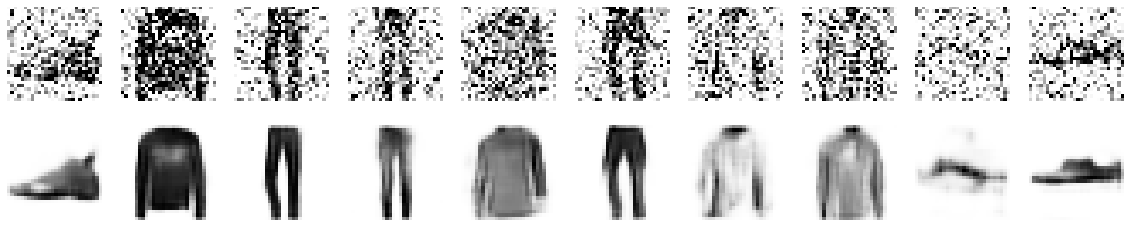

In [5]:
# Let's use the autoencoder on some of the test images
decoded_imgs = autoencoder.predict(x_test_noise)

# Now we can take a look
plt.figure(figsize=(20, 4))
for i in range(10):
  
    # display original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()